In [1]:
## Make this folder a git repo
!git init

Initialized empty Git repository in C:/Users/raini/Assignment-1/.git/


In [2]:
## Stop git from tracking spam_email_dataset.csv
!dvc  init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [5]:
!dvc remote add -d storage gdrive://1r6l9GWuioE5AohyGr8FxZXd9PumMkrU0


Setting 'storage' as a default remote.


In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import re

def read_dataset(file_path):
    """Reads data from a given file path"""
    return pd.read_csv(file_path)

def clean_text(text):
    """Cleans the text data"""
    text = text.lower().strip()
    text = re.sub(r"[^a-zA_Z\d\s]", "", text)
    stop_words = stopwords.words("english")
    words = word_tokenize(text)
    return " ".join(word for word in words if word not in stop_words)

def clean_data(data):
    """Cleans the data"""
    data = data.dropna()
    data["text"] = data["text"].apply(clean_text)
    return data.drop_duplicates(subset="text")

def partition_data(data):
    """Partitions the data into train/validation/test sets"""
    train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
    val_set, test_set = train_test_split(test_set, test_size = 0.5, random_state = 42)
    return train_set, val_set, test_set

def save_splits(train_set, val_set, test_set):
    """Saves the splits at train.csv, validation.csv, and test.csv"""
    train_set.to_csv("train.csv", index = False)
    val_set.to_csv("validation.csv", index = False)
    test_set.to_csv("test.csv", index = False)

# Read, clean, partition, and save data
dataset = read_dataset("spam_email_dataset.csv")
dataset = clean_data(dataset)
train_set, val_set, test_set = partition_data(dataset)
save_splits(train_set, val_set, test_set)


In [9]:
!dvc add test.csv train.csv validation.csv


To track the changes with git, run:

	git add test.csv.dvc .gitignore train.csv.dvc validation.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [10]:
!git add validation.csv.dvc test.csv.dvc train.csv.dvc .gitignore


In [11]:
!git commit -m "Random State 42"

[master f4e9ed8] Random State 42
 4 files changed, 18 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 test.csv.dvc
 create mode 100644 train.csv.dvc
 create mode 100644 validation.csv.dvc


In [18]:
!dvc push


Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=710796635688-iivsgbgsb6uv1fap6635dhvuei09o66c.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.appdata&access_type=offline&response_type=code&approval_prompt=force

Authentication successful.
3 files pushed


C:\Users\raini\anaconda3\lib\site-packages\oauth2client\_helpers.py:255: UserWarning: Cannot access C:\Users\raini\AppData\Local\pydrive2fs\Cache\710796635688-iivsgbgsb6uv1fap6635dhvuei09o66c.apps.googleusercontent.com\default.json: No such file or directory
  warnings.warn(_MISSING_FILE_MESSAGE.format(filename))


In [25]:
train_set, test_set = train_test_split(dataset, test_size = 0.2, random_state =  123)
val_set, test_set = train_test_split(test_set, test_size = 0.5, random_state = 123)
save_splits(train_set, val_set, test_set)

In [26]:
!dvc add test.csv train.csv validation.csv


To track the changes with git, run:

	git add validation.csv.dvc train.csv.dvc test.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [27]:
!git add validation.csv.dvc test.csv.dvc train.csv.dvc .gitignore


In [28]:
!git commit -m "Random State 123"

[master 46542f4] Random State 123
 3 files changed, 6 insertions(+), 6 deletions(-)


In [29]:
!dvc push


3 files pushed


In [34]:
!git log 


commit 46542f4d9a41a9ccf1ad9edd6dd8fb69cd274d0d
Author: Nidhi <nidhi@cmi.ac.in>
Date:   Tue Feb 20 23:13:48 2024 +0530

    Random State 123

commit f4e9ed8ccbe6cd24afc180900dc562a2a7b34bf0
Author: Nidhi <nidhi@cmi.ac.in>
Date:   Tue Feb 20 22:56:11 2024 +0530

    Random State 42

commit e6551945628bec2ae57d940580361259f88e1ea3
Author: Nidhi <nidhi@cmi.ac.in>
Date:   Tue Feb 20 22:55:43 2024 +0530

    dvc init


In [35]:
!git log --oneline


46542f4 Random State 123
f4e9ed8 Random State 42
e655194 dvc init


In [40]:
!git checkout f4e9ed8 train.csv.dvc test.csv.dvc validation.csv.dvc


Updated 3 paths from d6205be


In [41]:
!dvc pull


M       validation.csv
M       train.csv
M       test.csv
3 files modified


In [42]:
import matplotlib.pyplot as plt

# helper function for printing the distribution of 0's and 1's in spam column of the dataset
def display_distribution(dataset):
    count_values = dataset['spam'].value_counts()
    print(count_values)
    count_values.plot(kind='bar')
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title("Distribution of 0's and 1's in the 'spam' column")
    plt.show()


In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

0    3328
1    1075
Name: spam, dtype: int64


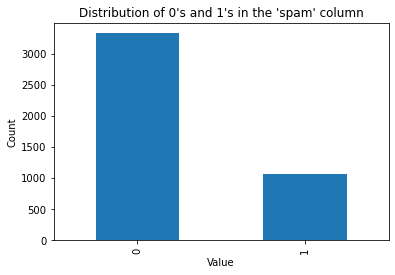

In [44]:
display_distribution(train)


0    397
1    154
Name: spam, dtype: int64


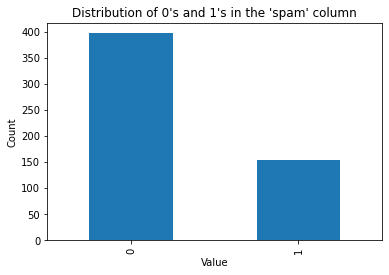

In [45]:
display_distribution(test)


0    412
1    138
Name: spam, dtype: int64


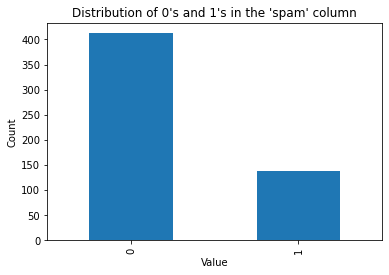

In [47]:
display_distribution(validation)


In [48]:
!git checkout 46542f4 train.csv.dvc test.csv.dvc validation.csv.dvc


Updated 3 paths from 23e7b61


In [52]:
!dvc pull

M       train.csv
M       validation.csv
M       test.csv
3 files modified


In [53]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

0    3310
1    1093
Name: spam, dtype: int64


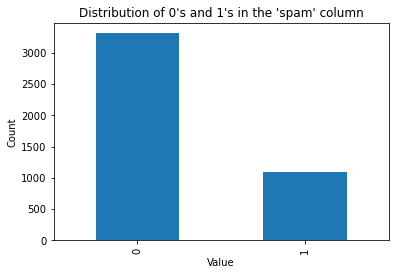

In [54]:
display_distribution(train)


0    413
1    138
Name: spam, dtype: int64


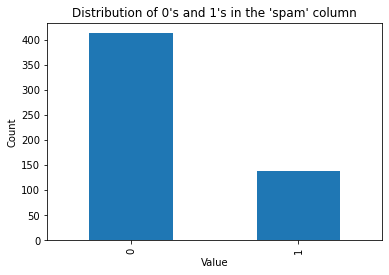

In [55]:
display_distribution(test)


0    414
1    136
Name: spam, dtype: int64


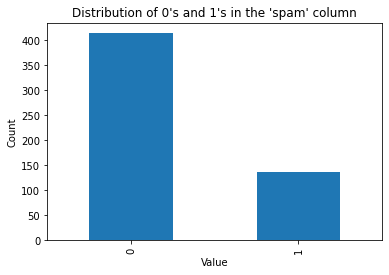

In [56]:
display_distribution(validation)
